In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm 
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [8]:
# Importing the dataset and Extracting the Independent and Dependent variables
recipes = pd.read_csv('/home/shivam/Downloads/Machine Learning Full/Machine Learning Tutorial Part 1 _ 2/Cupcakes vs Muffins.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


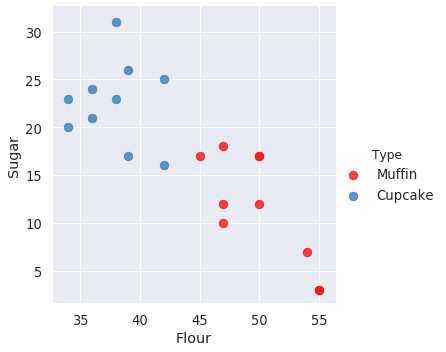

In [20]:
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70});

In [27]:
type_label=np.where(recipes['Type']=='Muffin',0,1)
recipe_features=recipes.columns.values[1:].tolist()
#recipe_features
ingredients=recipes[['Flour','Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

In [28]:
model=svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(30,60)
yy=a*xx-(model.intercept_[0])/w[1]

b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

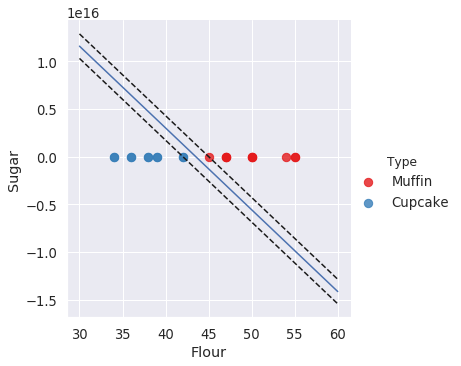

In [54]:
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70});
plt.plot(xx,yy)
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [46]:
def  muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print('Muffin')
    else:
        print('Cup cake')
muffin_or_cupcake(40,60)

Cup cake


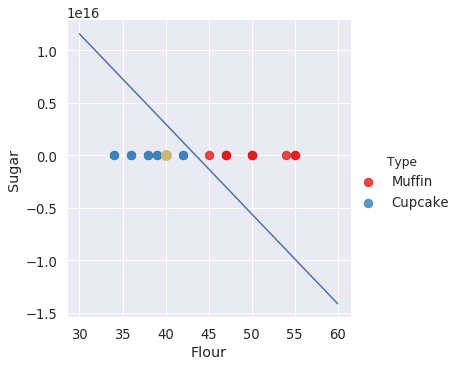

In [50]:
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70});
plt.plot(xx,yy)
plt.plot(40,60,'yo',markersize=10)